# Demo for generating compact reconfigurable and rigid-deployable random kirigami patterns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Structure import *
from Utils import *


## Basic setup

In [3]:
# the pattern size
width = 10
height = 10

# create a square kirigami structure
structure = MatrixStructure(num_linkage_rows=height, num_linkage_cols=width)
bound_linkage_inds = [structure.get_boundary_linkages(i) for i in range(4)]
bound_directions = np.array([[-1.0, 0.0], [0.0, -1.0], [1.0, 0.0], [0.0, 1.0]])
boundary_points = []
corners = []
for i, bound in enumerate(bound_linkage_inds):
    local_boundary_points = []
    for j, linkage_ind in enumerate(bound):
        p = structure.is_linkage_parallel_to_boundary(linkage_ind[0], linkage_ind[1], i)
        if j == 0:
            corner = np.array([linkage_ind[1], -linkage_ind[0]]) + bound_directions[i]
            if not p:
                corner += bound_directions[(i-1)%4]
            corners.append(corner)
        if not p:
            point = np.array([linkage_ind[1], -linkage_ind[0]]) + bound_directions[i]
            local_boundary_points.append(point)
    boundary_points.append(np.vstack(local_boundary_points))
corners = np.vstack(corners)

boundary_offsets = [[0.0]*height, [0.0]*width, [0.0]*height, [0.0]*width]


## Generate random offsets and get the resulting kirigami pattern

In [4]:
# create random offsets within (-0.9, 9)
interior_offsets = np.power(10, np.random.rand(height,width) * 2 - 1) - 1

# get the resulting random kirigami pattern using the linear inverse design method
structure.linear_inverse_design(np.vstack(boundary_points), corners, interior_offsets, boundary_offsets)
structure.assign_node_layers()
structure.assign_quad_genders()
structure.make_hinge_contact_points()


## Plot the result

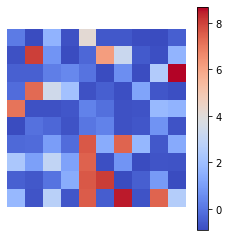

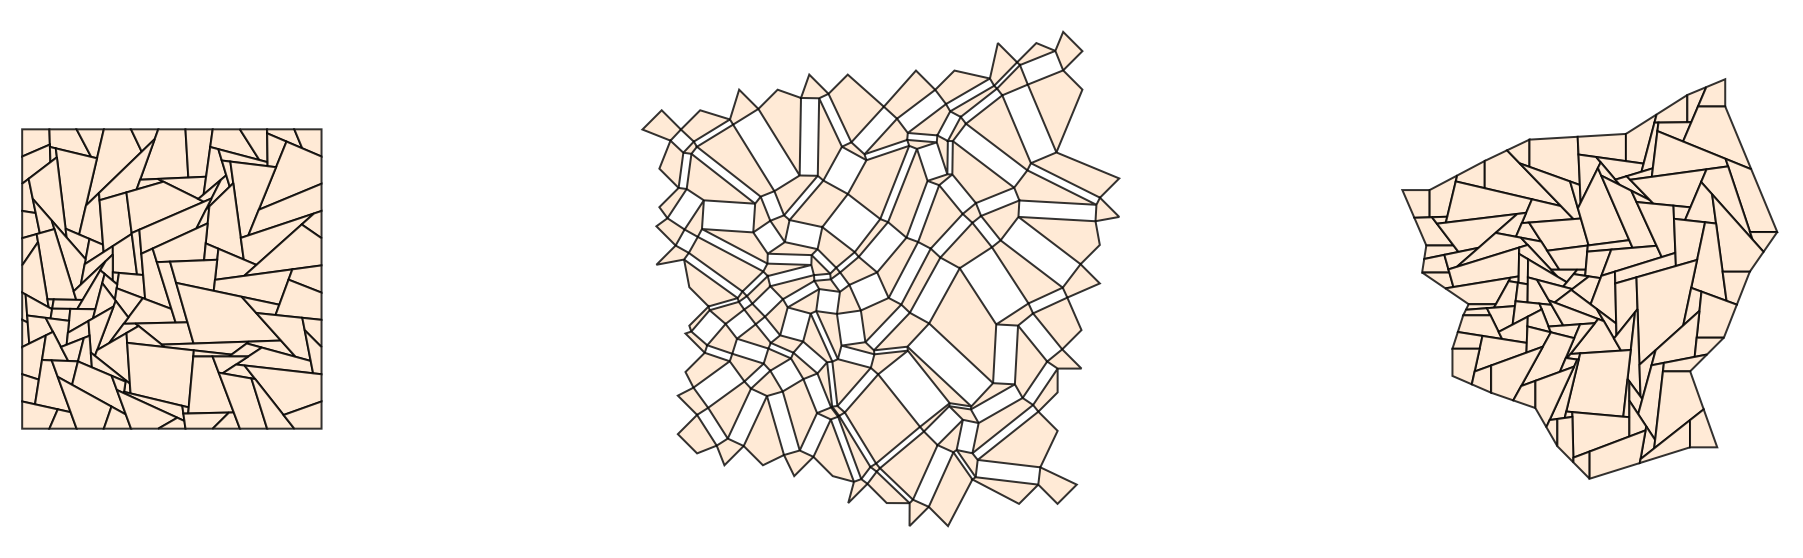

In [5]:
# plot the offset field
plt.matshow(interior_offsets, cmap='coolwarm')
plt.axis('off')
cbar = plt.colorbar()


# plot deployment snapshots of the structure created
num_frames = 3
phis = np.linspace(np.pi, 0, num_frames)
panel_size = 10
fig, axs = plt.subplots(1, num_frames, figsize=(1.2*panel_size*num_frames, panel_size), sharey=True)

for ax_ind, phi in enumerate(phis):
    
    deployed_points, deployed_hinge_contact_points = structure.layout(phi)
    deployed_points = rotate_points(deployed_points, np.array([0, 0]), -(np.pi - phi)/2.0)
    
    deployed_points[:,0] = deployed_points[:,0] - (np.max(deployed_points[:,0])+np.min(deployed_points[:,0]))/2
    deployed_points[:,1] = deployed_points[:,1] - (np.max(deployed_points[:,1])+np.min(deployed_points[:,1]))/2
    
    plot_structure(deployed_points, structure.quads, structure.linkages, axs[ax_ind])
    axs[ax_ind].set_aspect('equal')
    
#     write_obj('Example_random_' + str(ax_ind) +'.obj', deployed_points, structure.quads)